In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# from skimage.transform import resize

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *
from data_manager import *
from visualization_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node


No vtk


In [2]:
stack_fixed = 'MD662'
stack_moving = 'atlasV4'

In [3]:
warp_setting = 16
detector_id = 1
trial_idx = None

# warp_setting = 5
# classifier_setting = 30
# trial_idx = 0

In [33]:
# Read transformed volumes - one structure

# structure = '7n_L'

# warped_volumes = {}
# warped_volumes[structure] = DataManager.load_transformed_volume(stack_m=stack_moving, 
#                                                                           stack_f=stack_fixed, 
#                                     classifier_setting_m=classifier_setting,
#                                     classifier_setting_f=classifier_setting,
#                                     warp_setting=warp_setting,
#                                     trial_idx=trial_idx, structure=structure)

In [7]:
# Read transformed volumes - all structures

volume_downsample = 32 # downsample factor of registered volume.

warped_volumes = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, 
                                                                          stack_f=stack_fixed, 
                                                                        detector_id_f=detector_id,
                                                                        warp_setting=warp_setting,
                                                                          downscale=volume_downsample,
                                                                          trial_idx=None, sided=True)

Prior structure/index map not found. Generating a new one.


rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_sp5.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_sp5.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_sp5.bp"


File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_sp5.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_sp5.bp'
Score volume for sp5 does not exist.


rm -rf "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_outerContour.bp" && mkdir -p "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_outerContour.bp" "/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_outerContour.bp"


File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_outerContour.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_warp16_MD662_detector1_down32_scoreVolume_outerContour.bp'
Score volume for outerContour does not exist.


In [8]:
bbox_down32 = \
DataManager.load_original_volume_bbox(stack=stack_fixed, volume_type='score', structure='7N', 
                                      downscale=32, prep_id=2, detector_id=detector_id)
xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f, zmin_vol_f, zmax_vol_f = bbox_down32 * 32 / volume_downsample

print xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f, zmin_vol_f, zmax_vol_f

0 796 0 432 134 506


/usr/local/lib/python2.7/dist-packages/PIL/Image.py:2438: DecompressionBombWarning: Image size (353383424 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


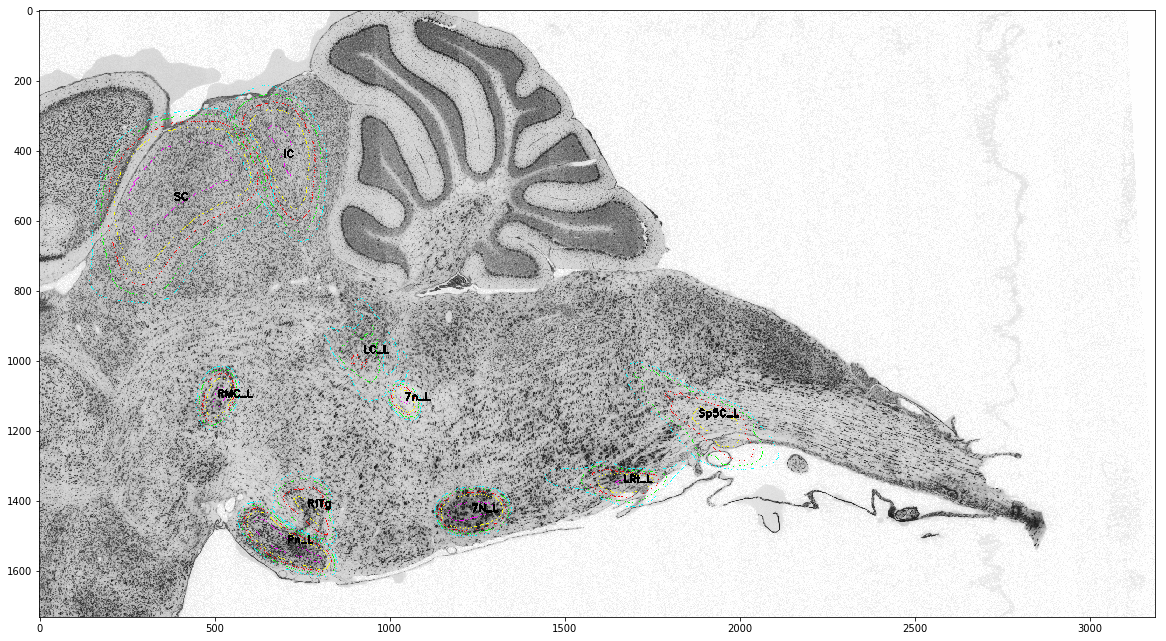

In [10]:
for sec in range(200, 201):
    viz = annotation_from_warped_atlas_overlay_on(bg='original', warped_volumes=warped_volumes, 
                                                  volume_origin=(xmin_vol_f, ymin_vol_f, zmin_vol_f),
                                                  stack_fixed=stack_fixed, sec=sec, out_downsample=8)
    plt.figure(figsize=(20, 20));
    plt.imshow(viz);
    plt.show();

In [ ]:
# Set colors for different contour level
levels = [0.1, 0.25, 0.5, 0.75, .99]
level_colors = {0.1: (0,255,255), 
                0.25: (0,255,0), 
                0.5: (255,0,0), 
                0.75: (255,255,0), 
                0.99: (255,0,255)}

# levels = [.5]
# level_colors = {level: (255,0,0) for level in levels}

# Parallel

In [34]:
show_text = True
contour_width = 1

In [35]:
def visualize_registration_one_section(sec):
    
    t = time.time()
    
    if downsample_factor == 32:
        img = DataManager.load_image(stack=stack_fixed, section=sec, resol='thumbnail', version='cropped_tif')
    else:
        img = DataManager.load_image(stack=stack_fixed, section=sec, resol='lossless', version='cropped_gray_jpeg')
        img = img[::downsample_factor, ::downsample_factor]
    
    if img.ndim == 2:
        img = gray2rgb(img)
        
    viz = img.copy()
    
    z = int(np.mean(DataManager.convert_section_to_z(stack=stack_fixed, sec=sec, downsample=volume_downsample)))
    
    # Find moving volume annotation contours.
    for name_s, vol in warped_volumes.iteritems():
        
        label_pos = None
        
        for level in levels:
            cnts = find_contours(vol[..., z], level=level) # rows, cols
            for cnt in cnts:
                # r,c to x,y
                cnt_on_cropped_volRes = cnt[:,::-1] + (xmin_vol_f, ymin_vol_f)
                cnt_on_cropped_imgRes = cnt_on_cropped_volRes * volume_downsample / downsample_factor
                cv2.polylines(viz, [cnt_on_cropped_imgRes.astype(np.int)], 
                              True, level_colors[level], contour_width)
                
                if show_text:
                    if label_pos is None:
                        label_pos = np.mean(cnt_on_cropped_imgRes, axis=0)
    
        # Show text 
        if label_pos is not None:
            cv2.putText(viz, name_s, tuple(label_pos.astype(np.int)), 
                    cv2.FONT_HERSHEY_DUPLEX, 1, ((0,0,0)), 3)
    
    viz_fp = DataManager.get_alignment_viz_filepath(stack_m=stack_moving,
                                                    stack_f=stack_fixed,
                                                    classifier_setting_m=classifier_setting,
                                                    classifier_setting_f=classifier_setting,
                                                    warp_setting=warp_setting,
                                                downscale=volume_downsample,
                                                    out_downscale=downsample_factor,
                                          section=sec)   
    create_parent_dir_if_not_exists(viz_fp)
    imsave(viz_fp, viz)
    upload_to_s3(viz_fp)
    
#     sys.stderr.write('Time: %.2f seconds\n' % (time.time() - t)) # 5s

In [36]:
t = time.time()

pool = Pool(NUM_CORES)
pool.map(visualize_registration_one_section, metadata_cache['valid_sections'][stack_fixed])
pool.terminate()
pool.join()

sys.stderr.write('Visualize registration: %.2f seconds\n' % (time.time() - t)) # 110s

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0090_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0090_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0096_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0096_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0128_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0128_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0081_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0081_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0087_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0087_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0114_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0114_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0078_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0078_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0109_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0109_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0110_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0110_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0105_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0105_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0226_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0226_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0204_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0204_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0217_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0217_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0233_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0233_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0223_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0223_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0239_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0239_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0240_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0240_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0168_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0168_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0247_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0247_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0257_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0257_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0263_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0263_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0268_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0268_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0274_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0274_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0284_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0284_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0275_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0275_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0290_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0290_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0301_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0301_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0311_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0311_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0343_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0343_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0348_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0348_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0335_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0335_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0365_down8.jpg s3://mousebrainatlas-data/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38/down8/atlasV4_down32_scoreVolume_clf_38_warp_8_MD635_down32_scoreVolume_clf_38_0365_down8.jpg
aws s3 cp /shared/CSHL_registration_visualization/atlasV4/atlasV4_down32_scoreVolume

Visualize registration: 158.28 seconds


# Sequential

In [22]:
# for stack in all_stacks:

#     img = DataManager.load_image(stack=stack, section=201, resol='lossless', version='cropped')
#     tb_img = DataManager.load_image(stack=stack, section=201, resol='thumbnail', version='cropped_tif')
#     assert tb_img.shape[0] * 32 == img.shape[0], stack
#     assert tb_img.shape[1] * 32 == img.shape[1], stack

In [31]:
show_text = True
contour_width = 1

[autoreload of utilities2015 failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AttributeError: __abstractmethods__
]


In [32]:
# for sec in range(first_sec, last_sec+1):
# for sec in metadata_cache['valid_sections'][stack_fixed]:
for sec in [155]:
            
    t = time.time()
    
    if downsample_factor == 32:
        img = DataManager.load_image(stack=stack_fixed, section=sec, resol='thumbnail', version='cropped_tif')
    else:
        img = DataManager.load_image(stack=stack_fixed, section=sec, resol='lossless', version='cropped_gray_jpeg')
#         img = resize(img, np.array(metadata_cache['image_shape'][stack_fixed][::-1])/downsample_factor)
        img = img[::downsample_factor, ::downsample_factor]
    
    if img.ndim == 2:
        img = gray2rgb(img)
        
    viz = img.copy()
    
    z = int(np.mean(DataManager.convert_section_to_z(stack=stack_fixed, sec=sec, downsample=volume_downsample)))
        
    # Find moving volume annotation contours.
    for name_s, vol in warped_volumes.iteritems():
        
        label_pos = None
        
        for level in levels:
            cnts = find_contours(vol[..., z], level=level) # rows, cols
            for cnt in cnts:
                # r,c to x,y
                cnt_on_cropped_volRes = cnt[:,::-1] + (xmin_vol_f, ymin_vol_f)
                cnt_on_cropped_imgRes = cnt_on_cropped_volRes * volume_downsample / downsample_factor
                cv2.polylines(viz, [cnt_on_cropped_imgRes.astype(np.int)], 
                              True, level_colors[level], contour_width)
                
                if show_text:
                    if label_pos is None:
                        label_pos = np.mean(cnt_on_cropped_imgRes, axis=0)
    
        # Show text 
        if label_pos is not None:
            cv2.putText(viz, name_s, tuple(label_pos.astype(np.int)), 
                    cv2.FONT_HERSHEY_DUPLEX, 1, ((0,0,0)), 3)
            
    viz_fp = DataManager.get_alignment_viz_filepath(stack_m=stack_moving,
                                                    stack_f=stack_fixed,
                                                    classifier_setting_m=classifier_setting,
                                                    classifier_setting_f=classifier_setting,
                                                    warp_setting=warp_setting,
                                                downscale=volume_downsample,
                                                    out_downscale=downsample_factor,
                                          section=sec)
    
#     create_if_not_exists(os.path.dirname(viz_fp))
#     imsave(viz_fp, viz)
    
    sys.stderr.write('Time: %.2f seconds\n' % (time.time() - t)) # 5s

Time: 3.69 seconds


In [33]:
display_image(viz)

/shared/MouseBrainAtlas/registration/tmp.jpg